# Filtragem Digital 2

Esta atividade consiste em projetar diferentes filtros passa-faixa e filtrar o sinal

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import *
from scipy import signal

1) Considere o sinal x, a soma de 3 senoides.

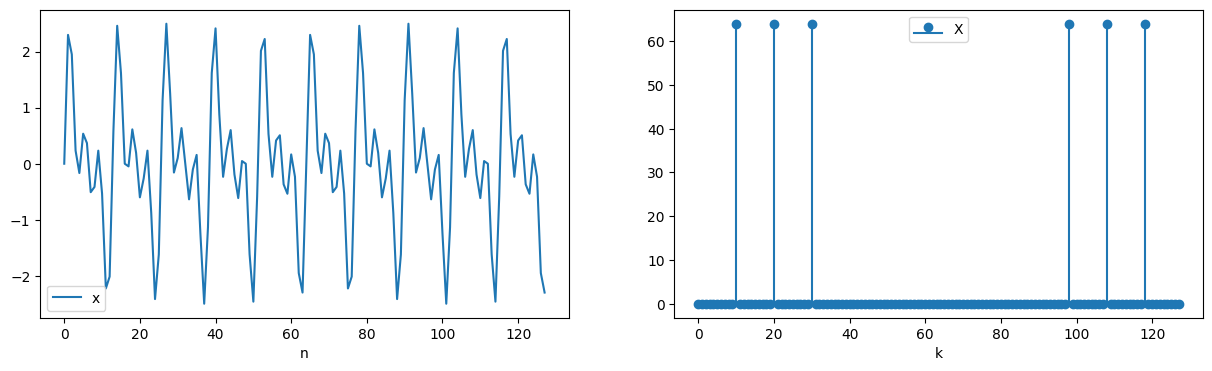

In [2]:
N=128
n=arange(N)
x1=sin(10*2*pi*n/N)
x2=sin(20*2*pi*n/N)
x3=sin(30*2*pi*n/N)
x=x1 + x2 + x3

figure(figsize=(15,4))
subplot(1,2,1)
plot(x,label='x')
legend()
xlabel('n')
subplot(1,2,2)
stem(abs(fft(x)),basefmt='C0', label='X')
legend()
xlabel('k')
show()

2) Projete um filtro FIR de ordem 9 para deixar passar somente a senoide central, usando a função signal.firwin().

$x_2[n] = \sin\left(\frac{20 \cdot 2\pi n}{N}\right)$


$f_0 = \frac{20}{N}$



$w_0 = 2\pi \cdot f_0 = 2\pi \cdot \frac{20}{N}$




C:\Users\Je\AppData\Local\Temp\ipykernel_23372\2455512669.py:4: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  filter_windows = firwin(ordem, wind, window='hamming',pass_zero=False, nyq=pi)


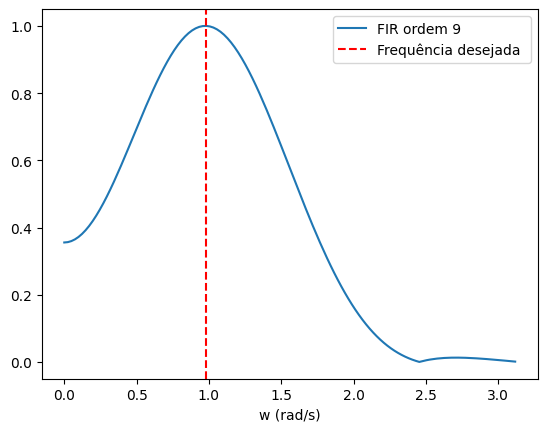

In [3]:
w_esperado = 2*pi*20/N
wind = [2*pi*15/N,2*pi*25/N]
ordem = 9+1
filter_windows = firwin(ordem, wind, window='hamming',pass_zero=False, nyq=pi)
w, h = freqz(filter_windows,1 , N)
plot(w, abs(h), label=("FIR ordem 9"))
plt.axvline(w_esperado, color='r', linestyle='--', label='Frequência desejada ')  
xlabel("w (rad/s)")
legend()
plt.show() 

In [4]:
get_window

<function scipy.signal.windows._windows.get_window(window, Nx, fftbins=True)>

3) Projete um filtro IIR de ordem 9, semelhante ao anterior, usando a função signal.butter()


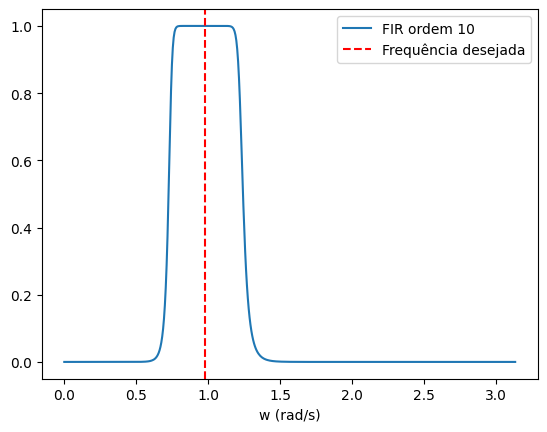

In [6]:
b, a = butter(ordem, wind,  btype="bandpass", fs=2*pi)
w1, h1 = freqz(b,a)
plot(w1, abs(h1), label=(f"FIR ordem {ordem}"))
plt.axvline(w_esperado, color='r', linestyle='--', label='Frequência desejada')  
xlabel("w (rad/s)")
legend()
plt.show() 

4) Plote o espectro do sinal X juntamente com as respostas em frequência dos dois filtros.


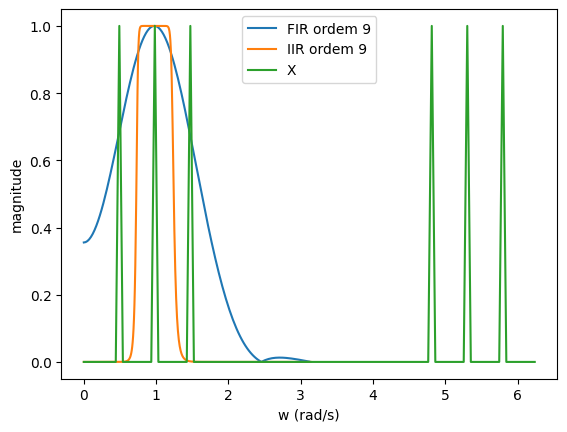

In [7]:
Xf = fft(x)
w0 = linspace(0, pi, N, endpoint = False)
plot(w, abs(h),label=("FIR ordem 9"))
plot(w1, abs(h1), label=("IIR ordem 9"))
plot(w0*2, abs(Xf/(0.5*N)), label=("X")) 
xlabel("w (rad/s)")
ylabel("magnitude")
legend()
plt.show()

5) Filtre o sinal pelos com cada filtro, e plote no mesmo eixo os dois sinais filtrados.


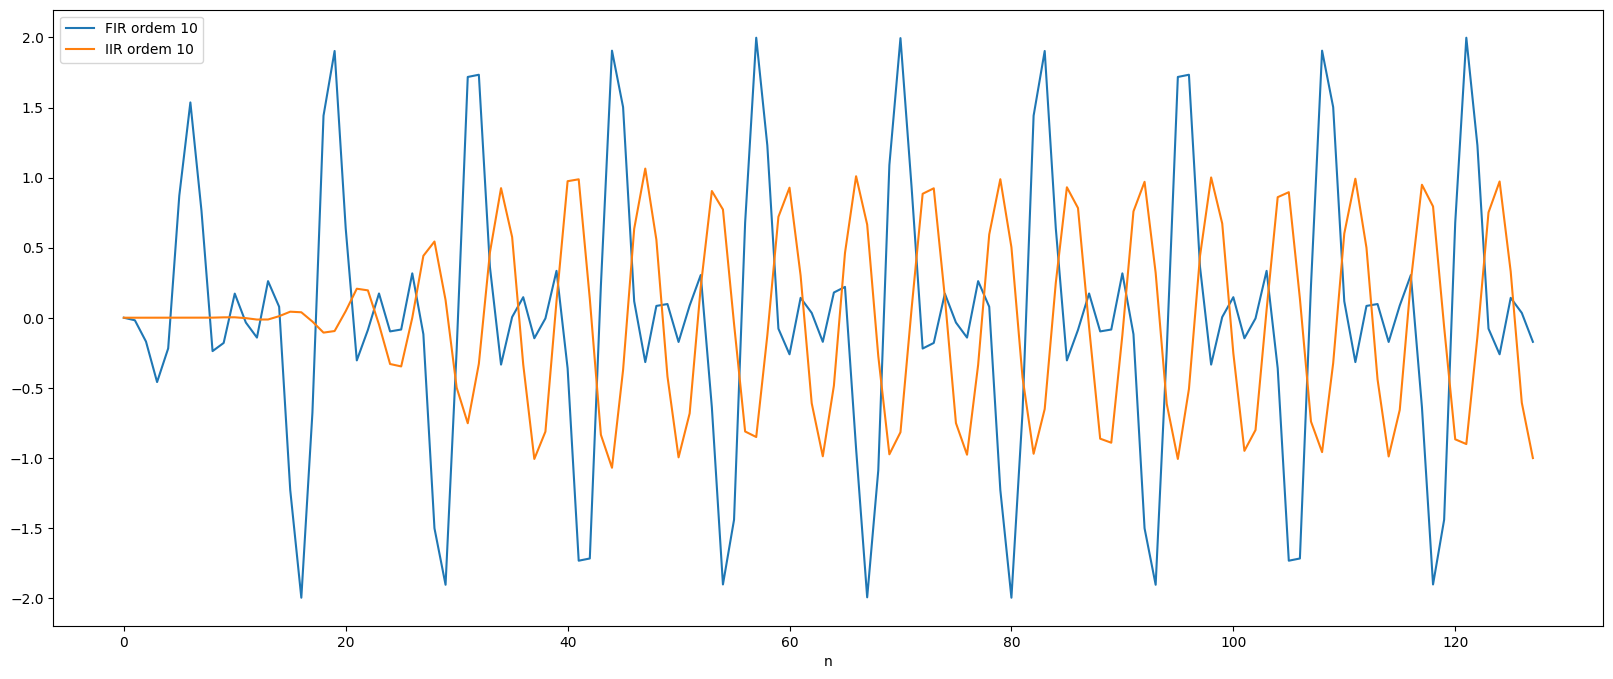

In [8]:
x_apos_fir = lfilter(filter_windows, 1, x)
x_apos_iir = lfilter(b, a, x)
figure(figsize=(20,8))
plot(x_apos_fir,label = f'FIR ordem {ordem}')
plot(x_apos_iir,label = f'IIR ordem {ordem}')
xlabel("n")
legend()
show()

6) qual dos dois filtros rejeitou melhor as frequencias baixa e alta ?


O filtro IRR butter

7) Plote no mesmo eixo a resposta em frequencia dos filtro FIR obtida de duas formas:<br>
a) freqz() <br>
b) T.F. da resposta ao impulso. (obs.: lembre que os proprios coeficiente do filtro são a resposta ao impulso. Pode completar a resposta com mais 60 zeros).

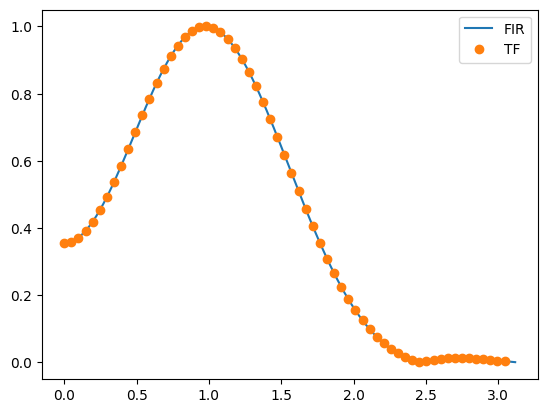

In [9]:
impulso = concatenate((ones(1),zeros(127)))  
filtro = lfilter(filter_windows ,1, impulso)
plt.plot(w, abs(h), label = 'FIR')
plt.plot(2*w[:63], abs(fft(filtro)[:63]), 'o', label = 'TF')
plt.legend()
plt.show()